In [1]:
import topmost
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset_dir = "./datasets/20NG"

d:\Anaconda\envs\rl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = topmost.data.BasicDataset(dataset_dir, read_labels=True, device = device)

train_size:  11314
test_size:  7532
vocab_size:  5000
average length: 110.543


In [3]:
ntm = topmost.ETM(dataset.vocab_size, pretrained_WE=dataset.pretrained_WE)
ntm = ntm.to(device)

from utils import load_model
ntm = load_model(ntm, model_name="etm_model_weights", device = device)

In [4]:
from environment import Environment
env = Environment(dataset = dataset, topic_model = ntm, num_top_words=5, device = device)

In [5]:
from policy import Policy_VAE
policy = Policy_VAE(dataset.vocab, env)

In [6]:
from torch import optim
optimizer = optim.Adam(policy.parameters(), lr=1e-3)

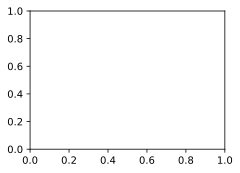

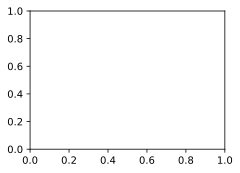

In [7]:
from trainer import ReinforceTrainer
trainer = ReinforceTrainer(policy, env, optimizer)

parsing texts: 100%|██████████| 1/1 [00:00<00:00, 1061.85it/s]
d:\Anaconda\envs\rl\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Epoch 0, Average Reward: -3.90, Policy Loss: -453.41, Net Loss: 44.12


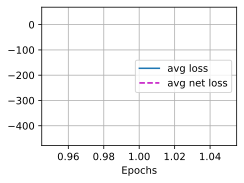

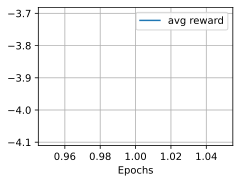

parsing texts: 100%|██████████| 1/1 [00:00<?, ?it/s]


Epoch 10, Average Reward: -3.43, Policy Loss: -428.73, Net Loss: 31.57


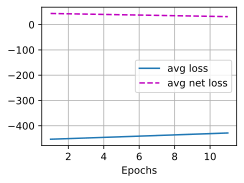

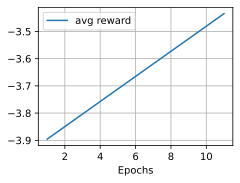

parsing texts: 100%|██████████| 1/1 [00:00<00:00, 931.86it/s]


Epoch 20, Average Reward: -3.84, Policy Loss: -409.60, Net Loss: 39.94


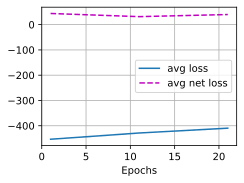

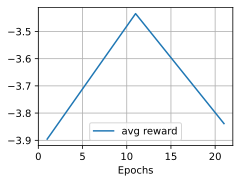

parsing texts: 100%|██████████| 1/1 [00:00<?, ?it/s]


Epoch 30, Average Reward: -3.67, Policy Loss: -427.37, Net Loss: 36.19


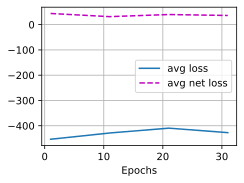

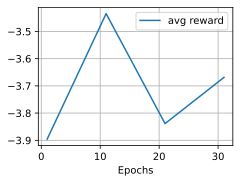

parsing texts: 100%|██████████| 1/1 [00:00<?, ?it/s]


Epoch 40, Average Reward: -3.54, Policy Loss: -381.04, Net Loss: 32.50


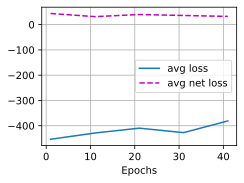

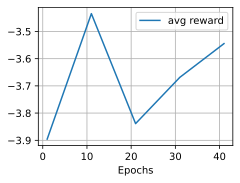

parsing texts: 100%|██████████| 1/1 [00:00<?, ?it/s]


Epoch 50, Average Reward: -3.52, Policy Loss: -407.38, Net Loss: 38.78


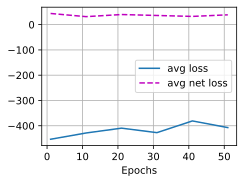

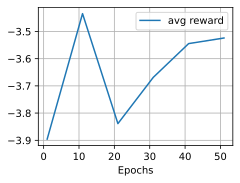

parsing texts: 100%|██████████| 1/1 [00:00<?, ?it/s]


Epoch 60, Average Reward: -3.21, Policy Loss: -370.27, Net Loss: 38.99


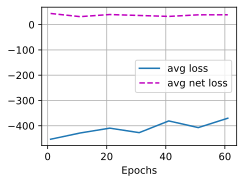

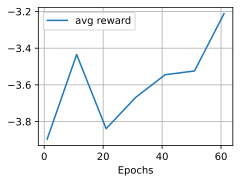

parsing texts: 100%|██████████| 1/1 [00:00<00:00, 999.36it/s]


KeyboardInterrupt: 

In [8]:
trainer.train()